## Fuentes
* Este contenido fue tomado del curso CS109 Data Science - Harvard School of Engineering and Applied Sciences
<a href=http://cs109.github.io/2014/>CS109 Data Science - 2014</a>

* Adaptaciones menores hechas para nuestro curso.

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import pandas as pd
import matplotlib.pyplot as plt

# pd.options.display.mpl_style = 'default'
plt.style.use('ggplot')

## This notebook will discuss the following:
* Brief introduction to Numpy, Scipy
    * Vectorizing functions
* More pandas and matplotlib
* Working in the command line
* Overview of git and Github

<a href=https://raw.githubusercontent.com/cs109/2014/master/labs/Lab3_Notes.ipynb download=Lab3_Notes.ipynb> Download the original notebook from Github </a>

## Numpy

NumPy and SciPy are modules in Python for scientific computing.  [NumPy](http://www.numpy.org) lets you do fast, vectorized operations on arrays.  Why use this module?  

* It gives you the performance of using low-level code (e.g. C or Fortran) with the benefit of writing the code in an interpreted scripting language (all while keeping the native Python code). 
* It gives you a fast, memory-efficient multidimensional array called `ndarray` which allows you perform vectorized operations on (and supports mathematical functions such as linear algebra and random number generation)

In [19]:
# Import NumPy
import numpy as np

To create a fast, multidimensional `ndarray` object, use the `np.array()` method on a python `list` or `tuple` or reading data from files. 

In [20]:
x = np.array([1,2,3,4])
y = np.array([[1,2], [3,4]])
x

array([1, 2, 3, 4])

In [21]:
y

array([[1, 2],
       [3, 4]])

In [22]:
type(x)

numpy.ndarray

#### Properties of NumPy arrays
There are a set of properties about the `ndarray` object such the dimensions, the size, etc.  

Property | Description
--- | ----
`y.shape` (or `shape(y)` | Shape or dimension of the array
`y.size` (or `size(y)`) | Number of elements in the array 
`y.ndim` | number of dimensions 


In [23]:
x.shape

(4,)

In [24]:
y.shape

(2, 2)

#### Other ways to generate NumPy arrays

Function | Description
--- | ---
`np.arange(start,stop,step)` | Create a range between the start and stop arguments
`np.linspace(start,stop,num)` | Create a range between start and stop (both ends included) of length num
`np.logspace(start, stop,num,base)` | Create a range in the log space with a define base of length num
`np.eye(n)` | Generate an n x n identity matrix

In [25]:
np.arange(0, 21, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

In [26]:
# Try it: Create a numpy array from 0 to 20 in steps of size 2

In [27]:
# Try it: Create a numpy array from -10 to 10 in steps of 0.5 (INCLUDING the number 10)

In [28]:
# Try it: Create a numpy array from 100 to 1000 of length 10

In addition, the `numpy.random` module can be used to create arrays using a random number generation 

In [29]:
from numpy import random

Function | Description
--- | ---
`np.random.randint(a, b, N)` | Generate N random integers between a and b
`np.random.rand(n, m)` | Generate uniform random numbers in [0,1] of dim n x m
`np.random.randn(n, m)` | Generate standard normal random numbers of dim n x m


In [30]:
np.random.randint(1, 100, 50)

array([44, 64,  2, 51, 97,  2, 26, 50, 34, 41, 63,  3, 74, 51, 17, 76, 69,
       10, 37, 93, 70, 67, 57, 71, 78, 56, 21,  7, 46, 64, 24, 45, 49, 68,
       66,  5,  5, 35, 62, 15, 10, 81, 62, 11, 60, 99, 57, 76,  9, 87])

In [31]:
# Try it: Create a numpy array filled with random samples 
# from a normal distribution of size 4 x 4
np.random.rand(4,4)

array([[0.54651305, 0.06117265, 0.08047967, 0.7149577 ],
       [0.50535775, 0.55970034, 0.5234866 , 0.74139872],
       [0.84862534, 0.81052568, 0.18435978, 0.65838694],
       [0.67404039, 0.04978494, 0.72922304, 0.08004254]])

#### Reshaping, resizing and stacking NumPy arrays

To reshape an array, use `reshape()`:

In [32]:
z = np.random.rand(4,4)
z 

array([[0.29912599, 0.5839673 , 0.29375315, 0.94299176],
       [0.42755929, 0.01377631, 0.41716221, 0.19736787],
       [0.63701536, 0.66078059, 0.21809361, 0.40514401],
       [0.87085462, 0.40866405, 0.47276428, 0.49681011]])

In [33]:
z.shape

(4, 4)

In [34]:
z.reshape((8,2)) # dim is now 8 x 2

array([[0.29912599, 0.5839673 ],
       [0.29375315, 0.94299176],
       [0.42755929, 0.01377631],
       [0.41716221, 0.19736787],
       [0.63701536, 0.66078059],
       [0.21809361, 0.40514401],
       [0.87085462, 0.40866405],
       [0.47276428, 0.49681011]])

To flatten an array (convert a higher dimensional array into a vector), use `flatten()`

In [35]:
z.flatten()

array([0.29912599, 0.5839673 , 0.29375315, 0.94299176, 0.42755929,
       0.01377631, 0.41716221, 0.19736787, 0.63701536, 0.66078059,
       0.21809361, 0.40514401, 0.87085462, 0.40866405, 0.47276428,
       0.49681011])

## Operating on NumPy arrays

#### Assigning values
To assign values to a specific element in a `ndarray`, use the assignment operator. 

In [36]:
y = np.array([[1,2], [3,4]])
y.shape

(2, 2)

In [37]:
y[0,0] = 10
y 

array([[10,  2],
       [ 3,  4]])

#### Indexing and slicing arrays
To extract elements of the NumPy arrays, use the bracket operator and the slice (i.e. colon) operator.  To slice specific elements in the array, use `dat[lower:upper:step]`. To extract the diagonal (and subdiagonal) elements, use `diag()`. 

In [43]:
 # random samples from a uniform distribution between 0 and 1
dat = np.random.rand(4,4)
dat

array([[0.42726909, 0.48661691, 0.92772933, 0.9086348 ],
       [0.89879256, 0.1262157 , 0.21955699, 0.07289336],
       [0.39398391, 0.92504478, 0.94260295, 0.41233948],
       [0.54913406, 0.77727109, 0.02372669, 0.55409011]])

In [44]:
dat[0, :] # row 1

array([0.42726909, 0.48661691, 0.92772933, 0.9086348 ])

In [45]:
dat[:, 0] # column 1

array([0.42726909, 0.89879256, 0.39398391, 0.54913406])

In [46]:
dat[0:3:2, 0] # first and third elements in column 1

array([0.42726909, 0.39398391])

In [47]:
np.diag(dat) # diagonal

array([0.42726909, 0.1262157 , 0.94260295, 0.55409011])

In [48]:
np.arange(32).reshape((8, 4)) # returns an 8 x 4 array

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [49]:
x[0] # returns the first row

1

#### Element-wise transformations on arrays
There are many vectorized wrappers that take in one scalar and produce one ore more scalars (e.g. `np.exp()`, `np.sqrt()`). This element-wise array methods are also known as NumPy `ufuncs`. 

Function | Description 
--- | --- 
`np.abs(x)` | absolute value of each element
`np.sqrt(x)` | square root of each element
`np.square(x)` | square of each element
`np.exp(x)` | exponential of each element
`np.maximum(x, y)` | element-wise maximum from two arrays x and y
`np.minimum(x,y)` | element-wise minimum
`np.sign(x)` | compute the sign of each element: 1 (pos), 0 (zero), -1 (neg)
`np.subtract(x, y)` | subtract elements in y from elements in x
`np.power(x, y)` | raise elements in first array x to powers in second array y
`np.where(cond, x, y)` | ifelse statement



## Vectorizing functions

It is important to state again that you should avoid looping through elements in vectors if at all possible.  One way to get around that when writing functions is to use what are called **vectorized functions**.  Say you wrote a function `f` which accepts some input `x` and checks if `x` is bigger or smaller than 0.  


In [51]:
def f(x):
    if x >=0:
        return True
    else:
        return False

print (f(3))

True


If we give the function an array instead of just one value (e.g. 3), then Python will give an error because there is more than one element in `x`.  The way to get around this is to **vectorize** the function.  

In [52]:
f_vec = np.vectorize(f)
z = np.arange(-5, 6)
z 

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5])

In [53]:
f_vec(z)

array([False, False, False, False, False,  True,  True,  True,  True,
        True,  True])

Instead of vectorizing the function, you can also make the function itself aware that it will be accepting vectors from the beginning. 

In [61]:
def f(x):
    return (x >= 0)

print (f(3))
print (f(z))

True
[False False False False False  True  True  True  True  True  True]


# Scipy

Now that you know a little bit about [NumPy](numpy.html) and SciPy is a collection of mathematical and scientific modules built on top of NumPy.  For example, SciPy can handle multidimensional arrays, integration, linear algebra, statistics and optimization.  

In [62]:
# Import SciPy
import scipy

SciPy includes most of NumPy, so importing SciPy should be generally OK. The main SciPy module is made up of many [submodules containing specialized topics](http://docs.scipy.org/doc/scipy/reference/). 

Favorite SciPy submodules | What does it contain? 
--- | --- 
`scipy.stats` | [statistics](http://docs.scipy.org/doc/scipy/reference/tutorial/stats.html): random variables, probability density functions, cumulative distribution functions, survival functions
`scipy.integrate` | [integration](http://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html): single, double, triple integration, trapezoidal rule, Simpson's rule, differential equation solvers
`scipy.signal` | [signal processing tools](http://docs.scipy.org/doc/scipy/reference/signal.html): signal processing tools such as wavelets, spectral densities, filters, B-splines
`scipy.optimize` | [optimization](http://docs.scipy.org/doc/scipy/reference/optimize.html): find roots, curve fitting, least squares, etc 
`scipy.special` | [special functions](http://docs.scipy.org/doc/scipy/reference/tutorial/special.html): very specialized functions in mathematical physics e.g. bessel, gamma
`scipy.linalg` | [linear algebra](http://docs.scipy.org/doc/scipy/reference/linalg.html): inverse of a matrix, determinant, Kronecker product, eigenvalue decomposition, SVD, functions for matrices (beyond those in `numpy.linalg`)

If you want to import a SciPy submodule (e.g. the statistics submodule `scipy.stats`), use 

In [63]:
from scipy import stats

#### scipy.stats 
Let's dive a bit deeper in `scipy.stats`. The real utility of this submodule is to access probability distributions functions (pdfs) and standard statistical tests (e.g. $t$-test).  

#### Probability distribution functions
There is a large collection of [continuous and discrete pdfs](http://docs.scipy.org/doc/scipy/reference/stats.html) in the `scipy.stats` submodule.  The syntax to simulate random variables from a specific pdf is the name of the distribution  followed by `.rvs`. To generate $n$=10 $N(0,1)$ random variables, 

Text(0.5, 1.0, 'Histogram of 1000 normal random variables')

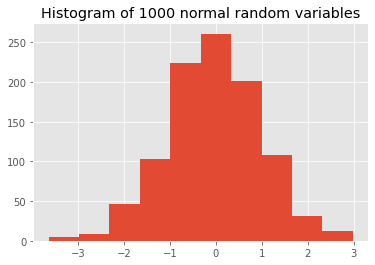

In [64]:
from scipy.stats import norm
x = norm.rvs(loc = 0, scale = 1, size = 1000)
plt.hist(x)
plt.title('Histogram of 1000 normal random variables')

# More Pandas and Matplotlib

## Motor Trend Car Road Tests Data

The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models). This dataset is available on Github in the [2014_data repository](https://github.com/cs109/2014_data) and is called `mtcars.csv`. 

## Reading in the mtcars data (CSV file) from the web

This is a `.csv` file, so we will use the function `read_csv()` that will read in a CSV file into a pandas DataFrame. 

In [66]:
url = 'https://raw.githubusercontent.com/cs109/2014_data/master/mtcars.csv'
mtcars = pd.read_csv(url, sep = ',', index_col=0)
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [67]:
# DataFrame with 32 observations on 11 variables
mtcars.shape 

(32, 11)

In [68]:
# return the column names
mtcars.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

Here is a table containing a description of all the column names. 

Column name | Description 
--- | --- 
mpg | Miles/(US) gallon
cyl | Number of cylinders
disp | Displacement (cu.in.)
hp | Gross horsepower
drat | Rear axle ratio
wt | Weight (lb/1000)
qsec | 1/4 mile time
vs | V/S
am | Transmission (0 = automatic, 1 = manual)
gear | Number of forward gears
carb | Number of carburetors


In [69]:
# return the actual data inside the panadas data frame
mtcars.values

array([[ 21.   ,   6.   , 160.   , 110.   ,   3.9  ,   2.62 ,  16.46 ,
          0.   ,   1.   ,   4.   ,   4.   ],
       [ 21.   ,   6.   , 160.   , 110.   ,   3.9  ,   2.875,  17.02 ,
          0.   ,   1.   ,   4.   ,   4.   ],
       [ 22.8  ,   4.   , 108.   ,  93.   ,   3.85 ,   2.32 ,  18.61 ,
          1.   ,   1.   ,   4.   ,   1.   ],
       [ 21.4  ,   6.   , 258.   , 110.   ,   3.08 ,   3.215,  19.44 ,
          1.   ,   0.   ,   3.   ,   1.   ],
       [ 18.7  ,   8.   , 360.   , 175.   ,   3.15 ,   3.44 ,  17.02 ,
          0.   ,   0.   ,   3.   ,   2.   ],
       [ 18.1  ,   6.   , 225.   , 105.   ,   2.76 ,   3.46 ,  20.22 ,
          1.   ,   0.   ,   3.   ,   1.   ],
       [ 14.3  ,   8.   , 360.   , 245.   ,   3.21 ,   3.57 ,  15.84 ,
          0.   ,   0.   ,   3.   ,   4.   ],
       [ 24.4  ,   4.   , 146.7  ,  62.   ,   3.69 ,   3.19 ,  20.   ,
          1.   ,   0.   ,   4.   ,   2.   ],
       [ 22.8  ,   4.   , 140.8  ,  95.   ,   3.92 ,   3.15 ,  22.9  ,
 

In [70]:
mtcars[25:] # rows 25 to end of data frame

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.9,1,1,4,1
Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.7,0,1,5,2
Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [71]:
# return index
mtcars.index

Index(['Mazda RX4', 'Mazda RX4 Wag', 'Datsun 710', 'Hornet 4 Drive',
       'Hornet Sportabout', 'Valiant', 'Duster 360', 'Merc 240D', 'Merc 230',
       'Merc 280', 'Merc 280C', 'Merc 450SE', 'Merc 450SL', 'Merc 450SLC',
       'Cadillac Fleetwood', 'Lincoln Continental', 'Chrysler Imperial',
       'Fiat 128', 'Honda Civic', 'Toyota Corolla', 'Toyota Corona',
       'Dodge Challenger', 'AMC Javelin', 'Camaro Z28', 'Pontiac Firebird',
       'Fiat X1-9', 'Porsche 914-2', 'Lotus Europa', 'Ford Pantera L',
       'Ferrari Dino', 'Maserati Bora', 'Volvo 142E'],
      dtype='object')

In [74]:
mtcars.loc['Maserati Bora'] # access a row by an index

mpg      15.00
cyl       8.00
disp    301.00
hp      335.00
drat      3.54
wt        3.57
qsec     14.60
vs        0.00
am        1.00
gear      5.00
carb      8.00
Name: Maserati Bora, dtype: float64

In [75]:
# What other methods are available when working with pandas DataFrames?
# type 'mtcars.' and then click <TAB>
# mtcars.<TAB>

# try it here


## Exploratory Data Analysis (EDA)

Even though they may look like continuous variabes, `cyl`, `vs`, `am`, `gear` and `carb` are integer or categorical variables. First, let's look at some summary statistics of the mtcars data set. 

In [76]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


#### Using conditional statements

To check if `any` or `all` elements in an array meet a certain criteria, use `any()` and `all()`. 

In [77]:
(mtcars.mpg >= 20).any()

True

In [78]:
(mtcars > 0).all()

mpg      True
cyl      True
disp     True
hp       True
drat     True
wt       True
qsec     True
vs      False
am      False
gear     True
carb     True
dtype: bool

Let's look at the distribution of `mpg` using a histogram.

<AxesSubplot:>

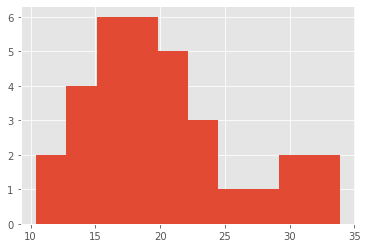

In [81]:
mtcars['mpg'].hist()

Text(0.5, 1.0, 'Relationship between cylinders and MPG')

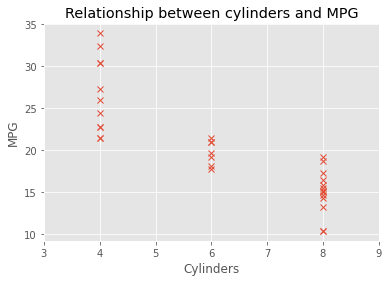

In [85]:
# Relationship between cyl and mpg
plt.plot(mtcars.cyl, mtcars.mpg, 'x')
plt.xlim(3, 9)
plt.xlabel('Cylinders')
plt.ylabel('MPG')
plt.title('Relationship between cylinders and MPG')

Text(0.5, 1.0, 'Relationship between horsepower and MPG')

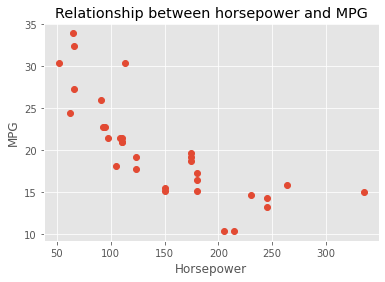

In [86]:
# Relationship between horsepower and mpg
plt.plot(mtcars.hp, mtcars.mpg, 'o')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Relationship between horsepower and MPG')

array([[<AxesSubplot:xlabel='mpg', ylabel='mpg'>,
        <AxesSubplot:xlabel='hp', ylabel='mpg'>,
        <AxesSubplot:xlabel='cyl', ylabel='mpg'>],
       [<AxesSubplot:xlabel='mpg', ylabel='hp'>,
        <AxesSubplot:xlabel='hp', ylabel='hp'>,
        <AxesSubplot:xlabel='cyl', ylabel='hp'>],
       [<AxesSubplot:xlabel='mpg', ylabel='cyl'>,
        <AxesSubplot:xlabel='hp', ylabel='cyl'>,
        <AxesSubplot:xlabel='cyl', ylabel='cyl'>]], dtype=object)

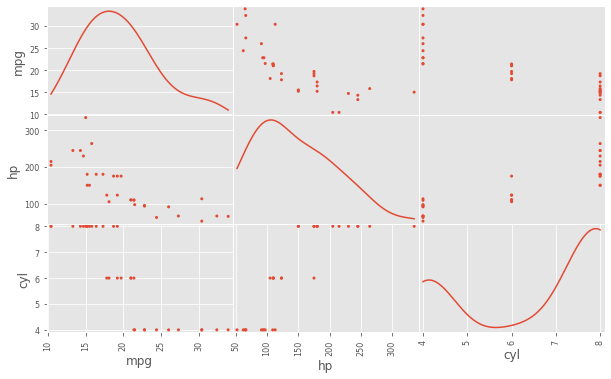

In [87]:
# from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix
scatter_matrix(mtcars[['mpg', 'hp', 'cyl']], 
               figsize = (10, 6), alpha = 1, diagonal='kde')